<h1 align="center">MNIST Digit Recognition using Artificial Neural Networks</h1>

# 1. Introduction

In this notebook, we will build and train an Artificial Neural Network (ANN) to recognize handwritten digits using the MNIST dataset. We'll go through the entire process including data preparation, model architecture design, training, evaluation, and visualization of results.

## 1.1. The MNIST Dataset

The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits (0-9), divided into 60,000 training examples and 10,000 test examples. Each image is 28x28 pixels in size.

## 1.2. Project Overview

Our goal is to build a neural network that can accurately classify handwritten digits. The notebook will cover:
- Loading and preprocessing the MNIST data
- Building a multi-layer neural network
- Training the model with appropriate techniques
- Evaluating model performance
- Visualizing results

# 2. Data Preparation

First, let's load and prepare the MNIST dataset for training.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Create directory if it doesn't exist
os.makedirs('data/mnist', exist_ok=True)

# Download and load MNIST dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

2025-04-22 21:52:14.279316: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 21:52:14.328047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-22 21:52:14.328131: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-22 21:52:14.329370: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 21:52:14.339663: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 21:52:14.341663: I tensorflow/core/platform/cpu_feature_guard.cc:1

Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


## 2.1. Data Preprocessing

Before feeding the data to our neural network, we need to preprocess it:

In [2]:
# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data for the model (flattening the images)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print(f"Flattened training data shape: {X_train_flattened.shape}")
print(f"Flattened test data shape: {X_test_flattened.shape}")

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

print(f"One-hot encoded training labels shape: {y_train_onehot.shape}")
print(f"One-hot encoded test labels shape: {y_test_onehot.shape}")

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)
One-hot encoded training labels shape: (60000, 10)
One-hot encoded test labels shape: (10000, 10)


## 2.2. Visualizing Sample Images

Let's visualize some sample images from our dataset to better understand what we're working with:

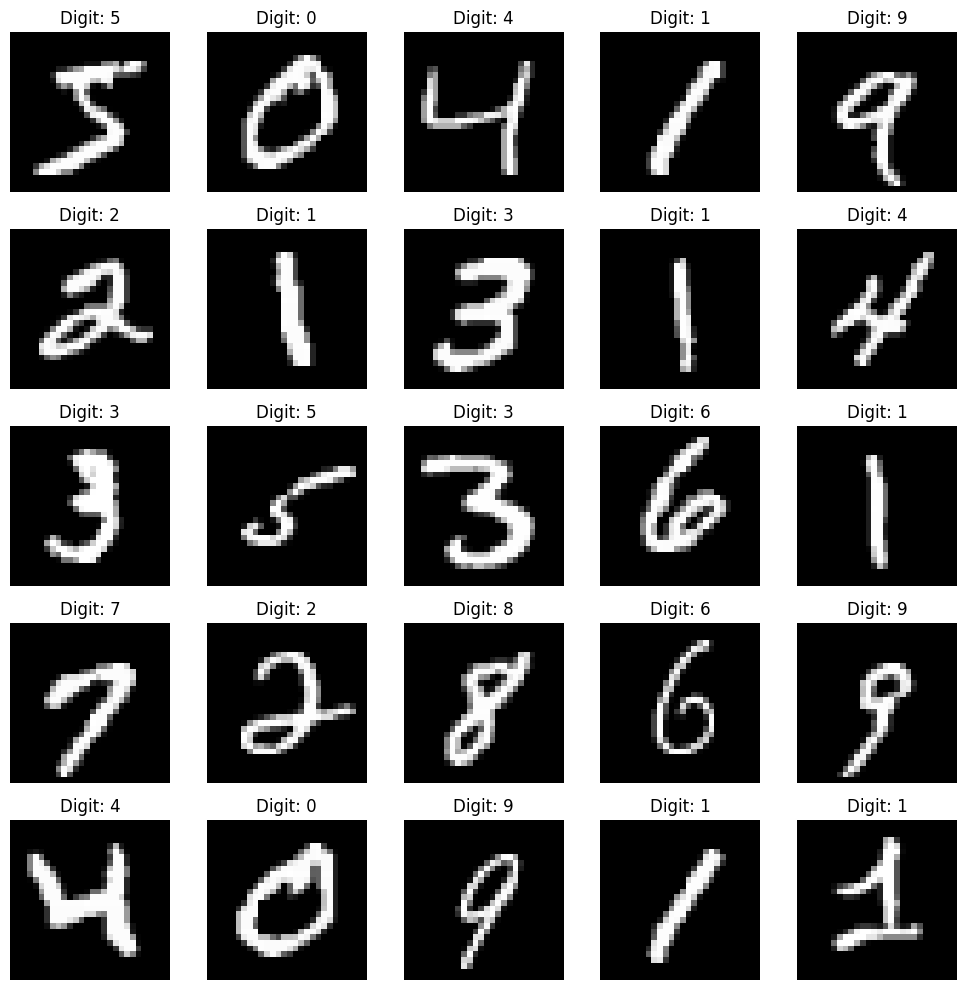

In [3]:
# Plot a grid of sample digits
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Model Architecture

Now we'll design our Artificial Neural Network (ANN) model for digit recognition.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
print("Building the ANN model...")
model = Sequential([
    # Input layer
    Dense(512, activation='relu', input_shape=(X_train_flattened.shape[1],)),
    Dropout(0.2),
    
    # Hidden layers
    Dense(256, activation='relu'),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    
    # Output layer - 10 classes (digits 0-9)
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Building the ANN model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (

## 3.1. Architecture Explanation

Our neural network consists of:

- An input layer with 784 nodes (28×28 pixels)
- Three fully connected (Dense) layers with ReLU activation
- Dropout layers to prevent overfitting
- An output layer with 10 nodes (one for each digit) and softmax activation

The architecture is designed to progressively extract higher-level features from the raw pixel data.

# 4. Model Training

Let's set up the training process with callbacks to improve performance and prevent overfitting.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set up callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath='models/mnist_ann_best.h5',
        monitor='val_accuracy',
        save_best_only=True
    )
]

# Train the model
print("Training the model...")
history = model.fit(
    X_train_flattened, y_train_onehot,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Training the model...
Epoch 1/50
375/375 [==============================] - 7s 15ms/step - loss: 0.3584 - accuracy: 0.8919 - val_loss: 0.1213 - val_accuracy: 0.9647
Epoch 2/50
 11/375 [..............................] - ETA: 4s - loss: 0.1503 - accuracy: 0.9560

/usr/local/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 5s 14ms/step - loss: 0.1353 - accuracy: 0.9598 - val_loss: 0.1064 - val_accuracy: 0.9675
Epoch 3/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0998 - accuracy: 0.9704 - val_loss: 0.0914 - val_accuracy: 0.9728
Epoch 4/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0798 - accuracy: 0.9758 - val_loss: 0.0889 - val_accuracy: 0.9732
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0867 - val_accuracy: 0.9777
Epoch 6/50
375/375 [==============================] - 6s 15ms/step - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.0762 - val_accuracy: 0.9786
Epoch 7/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0811 - val_accuracy: 0.9787
Epoch 8/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0910 - val_accuracy: 0.9752
Epoch 9/50

## 4.1. Training Callbacks

We use two important callbacks:

- EarlyStopping: Stops training when validation loss stops improving
- ModelCheckpoint: Saves the best model based on validation accuracy

## 4.2. Visualizing Training Progress

Let's visualize the training and validation metrics over time:

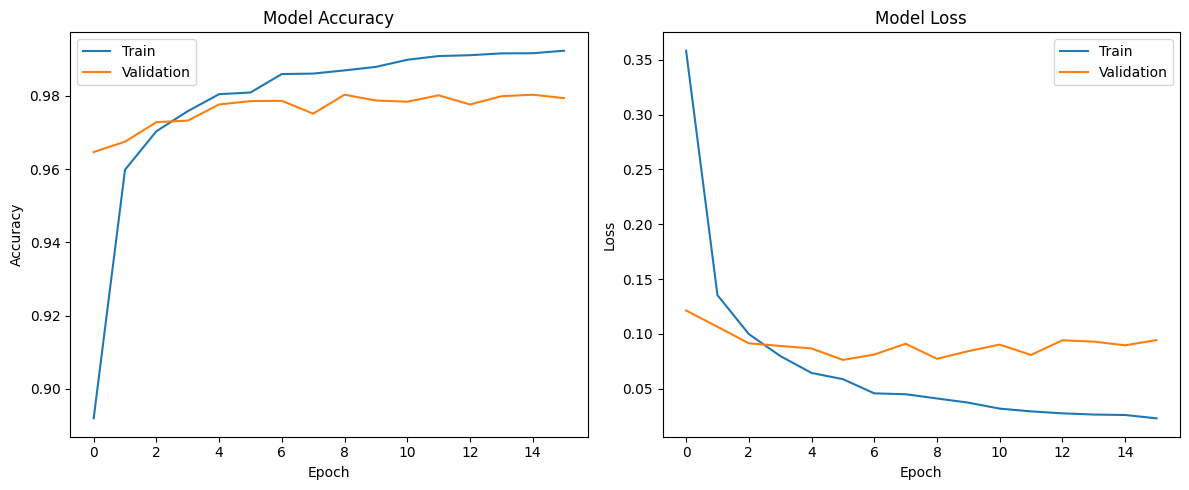

In [6]:
# Create training history plots
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Model Evaluation

Now let's evaluate our trained model on the test set.

In [7]:
# Evaluate the model
print("Evaluating the model...")
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_onehot)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Generate predictions
y_pred = model.predict(X_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1)

Evaluating the model...
313/313 [==============================] - 1s 4ms/step - loss: 0.0663 - accuracy: 0.9803
Test accuracy: 0.9803
Test loss: 0.0663
313/313 [==============================] - 1s 4ms/step


## 5.1. Confusion Matrix

The confusion matrix helps us understand which digits are being misclassified:

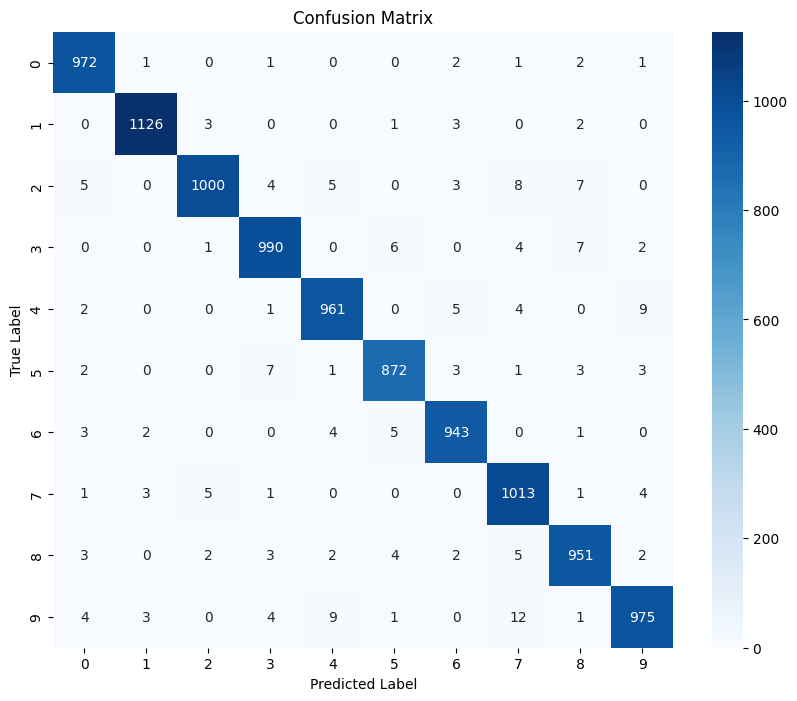

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 5.2. Classification Report

Let's get a more detailed breakdown of the model's performance:

In [9]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_classes, digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.9798    0.9918    0.9858       980
           1     0.9921    0.9921    0.9921      1135
           2     0.9891    0.9690    0.9790      1032
           3     0.9792    0.9802    0.9797      1010
           4     0.9786    0.9786    0.9786       982
           5     0.9809    0.9776    0.9792       892
           6     0.9813    0.9843    0.9828       958
           7     0.9666    0.9854    0.9759      1028
           8     0.9754    0.9764    0.9759       974
           9     0.9789    0.9663    0.9726      1009

    accuracy                         0.9803     10000
   macro avg     0.9802    0.9802    0.9802     10000
weighted avg     0.9803    0.9803    0.9803     10000



# 6. Visualizing Predictions

Let's visualize some of our model's predictions on test images:

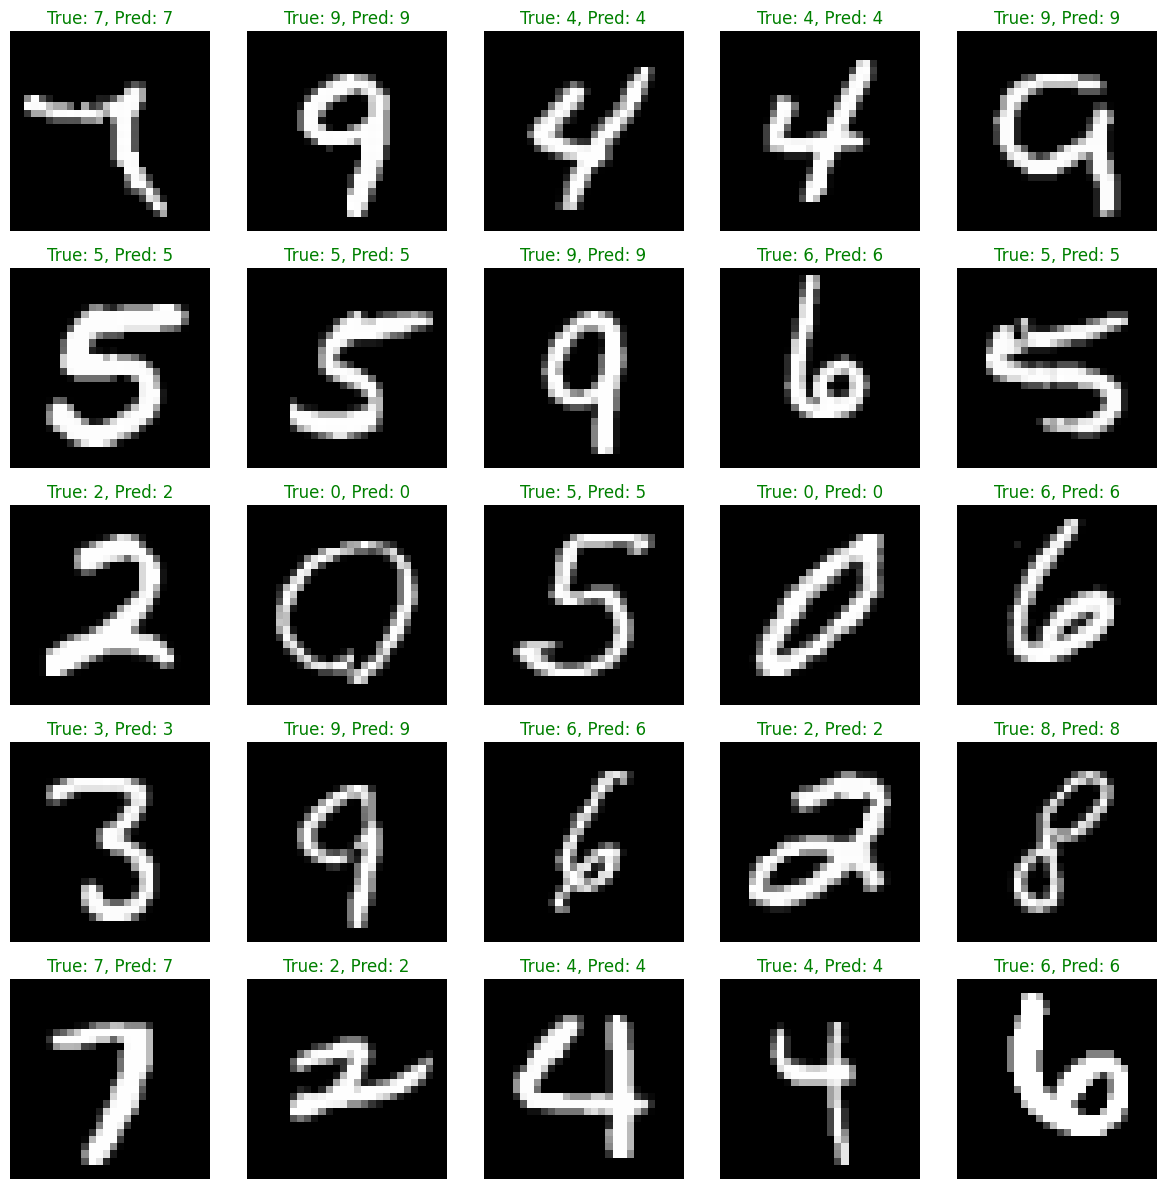

In [10]:
# Visualize predictions
n_samples = 25  # 5x5 grid
plt.figure(figsize=(12, 12))
for i in range(n_samples):
    plt.subplot(5, 5, i+1)
    # Get random test image
    idx = np.random.randint(0, X_test.shape[0])
    img = X_test[idx]
    true_label = y_test[idx]
    pred_label = y_pred_classes[idx]
    
    # Show image
    plt.imshow(img, cmap='gray')
    
    # Set title color based on prediction correctness
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}, Pred: {pred_label}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 7. Saving the Model

Finally, let's save our trained model for future use:

In [11]:
# Save the final model
model.save('models/mnist_ann_final.h5')
print("Model saved to models/mnist_ann_final.h5")

Model saved to models/mnist_ann_final.h5


/usr/local/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 8. Conclusion

In this notebook, we've successfully built and trained an Artificial Neural Network to recognize handwritten digits from the MNIST dataset. Our model achieves high accuracy on the test set, demonstrating the effectiveness of our chosen architecture and training approach.

## 8.1. Next Steps

Here are some potential next steps to explore:

- Try different network architectures (more/fewer layers, different sizes)
- Experiment with different optimization algorithms
- Implement data augmentation to improve generalization
- Try Convolutional Neural Networks (CNNs) which are specifically designed for image data